# Численные методы

## Лабораторная работа 2

### Вариант 1
### Студент: Тимофеенко Никита

#### Задание 1(А, Б, В).

Метод Эйлера - численный метод решения систем обыкновенных ДУ. Основан на аппроксимации интегральной кривой (график решения геометрически неопределенного интеграла) кусочно - линейной функцией (ломаная Эйлера).




![](2023-03-31_13-11-12.png)


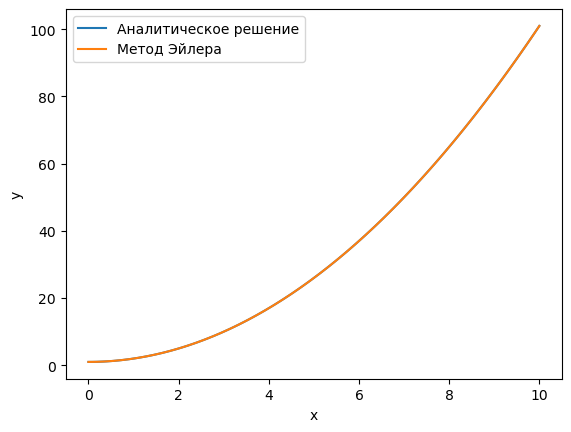

Аналитическое решение: x = 10.0, y = 101.0
Метод Эйлера: x = 10.0, y = 100.99000000000001


In [2]:
import numpy as np
import matplotlib.pyplot as plt




def y1(x):                                      # y = x^2 + C
    """ Определяем аналитическое решение """    # Здесь C - произвольная константа интегрирования, которая должна быть определена из начального условия y(0) = 1. Подставляя x=0 и y=1, получаем:
    return x ** 2 + 1                           # Подставляя x=0 и y=1, получаем: 1 = 0^2 + C, C = 1


x1 = np.linspace(0, 10, 100)
plt.plot(x1, y1(x1), label='Аналитическое решение')


def f(x, y):
    """ Определяем правую часть уравнения  """
    return 2 * x


y0_Euler = 1                                    # для решения методом Эйлера
h = 0.001                                       # шаг приближения
x = np.arange(0, 10 + h, h)                     # разбиваем интервал на шаги
y = np.zeros_like(x)                            # нужен для сохранения всех значений y_i
y[0] = y0_Euler                                 # начальное значение, которое сохраняем в нулевом элементе массива

for i in range(0, len(x) - 1):                  # Цикл выполняется от i = 0 до i = n-1, где n - количество шагов, на которые разбит интервал [0, 10]
    y[i + 1] = y[i] + h * f(x[i], y[i])         # вычисление приближённых значений функции y на каждом шаге с использованием формулы


plt.xlabel('x')
plt.ylabel('y')


plt.plot(x, y, label='Метод Эйлера')
plt.legend()

plt.show()

print(f'Аналитическое решение: x = {x1[-1]}, y = {y1(x1)[-1]}')
print(f'Метод Эйлера: x = {x[-1]}, y = {y[-1]}')

#### Задание 1(Г, Д).

Метод Рунге-Кутты основан на итерационном процессе, который позволяет вычислить значение функции в заданных точках сетки. Обычно сетка выбирается равномерной, и расстояние между точками сетки обозначается h.

Метод Рунге-Кутты начинается с задания начальных условий для решения ОДУ в начальной точке сетки. Затем метод использует формулы, которые позволяют вычислить функцию в следующей точке сетки, используя значения функции в предыдущих точках. Количество этих формул зависит от порядка метода, который определяет точность метода.

In [18]:
from scipy.integrate import solve_ivp


def f(x, y):
	""" Определяем правую часть уравнения  """
	return 2 * x


y = [1]
x_span = [0, 10]
result = solve_ivp(f, x_span, y)

print(f' Решение с помощью метода Рунге - Кутта: x = {result.t[-1]}, y = {result.y[0][-1]}')

 Решение с помощью метода Рунге - Кутта: x = 10.0, y = 100.99999999999999


In [21]:
from scipy.integrate import odeint
import numpy as np


def f(y, x):
	""" Определяем правую часть уравнения """
	return 2 * x


x0 = 0                                 # начальное значение x
y0 = 1                                 # начальное значение y
x_range = np.linspace(0, 10, 1000)     # интервал значений x
y = odeint(f, y0, x_range)             # решаем уравнение


print(f' Решение с помощью встроенного метода odeint: x = {x_range[-1]}, y = {y[-1][0]}')

 Решение с помощью встроенного метода odeint: x = 10.0, y = 101.00000000000298


#### Задание 2.


![](2023-03-31_13-26-40.png)


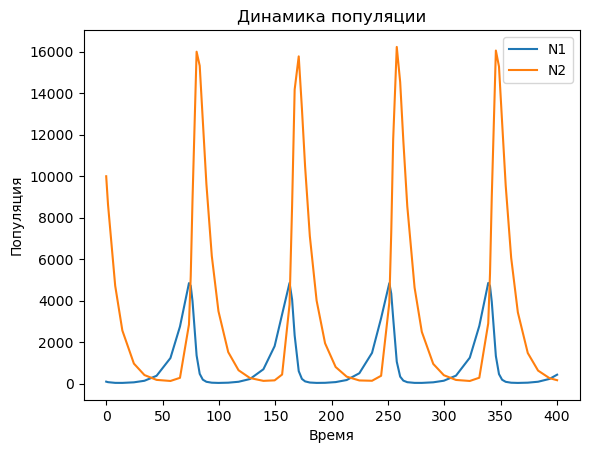

In [6]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def f(t, y):
    """ Определяем правую часть системы дифференциальных уравнений """
    N1, N2 = y
    r1 = 0.1
    r2 = 0.1
    b12 = 3e-5
    b21 = 1e-4
    dN1dt = N1 * (r1 - b12 * N2)
    dN2dt = N2 * (-r2 + b21 * N1)
    return [dN1dt, dN2dt]

# Определяем начальные условия
N1_0 = 100
N2_0 = 10000
y0 = [N1_0, N2_0]

# Определяем интервал времени, на котором будет решаться система дифференциальных уравнений
t_span = [0, 400]

# Решаем систему дифференциальных уравнений с помощью функции solve_ivp
sol = solve_ivp(f, t_span, y0)

# Извлекаем решение из объекта sol и строим графики
plt.plot(sol.t, sol.y[0], label='N1')
plt.plot(sol.t, sol.y[1], label='N2')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.title('Динамика популяции')
plt.legend()
plt.show()

#### Вывод.

Параметр r1 в уравнении для численности хозяев описывает скорость естественного прироста популяции. Биологический смысл этого параметра заключается в том, что он определяет, насколько быстро популяция будет расти в отсутствие внешних факторов